In [2]:
import numpy as np
import matplotlib.pyplot as plt

# add the path to my packages to system paths so they can be imported
import sys
sys.path.append('/home/yasamanparhizkar/Documents/yorku/01_thesis/code/my_packages')
# sys.path.append('F:\MAScThesis\code\my_packages')
# sys.path.append('/home/yasamanparhizkar/Documents/thesis/code/my_packages')

import dataprocess.my_first_feature_extractor as fe

# Show statistics

## Descriptor format:
[x, y, z, el0, el1, ..., el767]
<br>
Each row is a single feature descriptor. 
<br>
[x, y, z] are the keypoint's coordinates in 3D-image space, and [el0, el1, ..., el767] are the 768 dimensions of the descriptor.

## Keypoint format:
<br>
Each row is a keypoint. The elements of each row are as follows:
<br>
[x, y, z, o, s, $ori_{11}, ori_{12}, ..., ori_{nn}$]
<br>
x - the x-coordinate
<br>
y - the y-coordinate
<br>
z - the z-coordinate
<br>
o - the pyramid octave. To convert to image coordinates, multiply x,y,z by pow(2, o)
<br>
s - the scale coordinate
<br>
$ori_{ij}$ - the ith row, jth column of the orientation matrix

In [5]:
# print('Number of keyponits in each batch:')
dataset_sz = 1141
num_kps = []
for batch_i in range(dataset_sz):
    keys = np.loadtxt('../../data/features/sift3d/raw/keys_'+str(batch_i)+'.csv')
    num_kps.append(keys.shape[0])

In [6]:
print('Minimum number of keypoints: ', min(num_kps))
print('Maximum number of keypoints: ', max(num_kps))
print('Mean number of keypoints: {:.2f}'.format(np.mean(num_kps)))

Minimum number of keypoints:  369
Maximum number of keypoints:  753
Mean number of keypoints: 532.57


(array([ 22.,  29., 162., 297., 316., 186.,  66.,  45.,  11.,   7.]),
 array([369. , 407.4, 445.8, 484.2, 522.6, 561. , 599.4, 637.8, 676.2,
        714.6, 753. ]),
 <BarContainer object of 10 artists>)

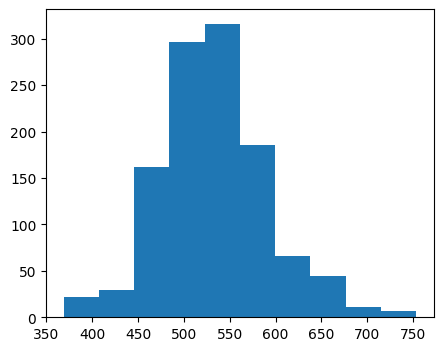

In [7]:
plt.figure(figsize=(5,4))
plt.hist(num_kps)

# Floor
Discard batches that have less that a certain number of keypoints

In [9]:
cutoff = 1
to_discard = []
for batch_i in range(dataset_sz):
    keys = np.loadtxt('../../data/features/sift3d/raw/keys_'+str(batch_i)+'.csv')
    if keys.shape[0] < cutoff:
        to_discard.append(batch_i)
        
print('The following batches have less than {} keypoints:\n{}'.format(cutoff, to_discard))

The following batches have less than 1 keypoints:
[]


# Ceiling

Choose only a certain number of keypoints in batches that have more keypoints.

## Strategy 1:

Select one keyponit closest to the center of the batch.

In [13]:
dataset_sz = 1141
batch_sz = 32
frame_x = 200
frame_y = 120
cpt = np.array([frame_x//2, frame_y//2, batch_sz//2]) # coordinates of the frame-batch's center


for batch_i in range(dataset_sz):
    if batch_i not in to_discard:
        # initialize min distance from the batch's center
        min_dist = np.inf
        
        # load the batch's descriptors and keypoints
        desc = np.loadtxt('../../data/features/sift3d/raw/desc_'+str(batch_i)+'.csv')
        keys = np.loadtxt('../../data/features/sift3d/raw/keys_'+str(batch_i)+'.csv')
        
        # chose the desired keypoint
        kpstar = -1
        for kp_i in range(desc.shape[0]):
            if np.linalg.norm(desc[kp_i][:3]-cpt) < min_dist:
                kpstar = kp_i
        
        # save the chosen keypoint's descriptor as the batch's feature vector
        np.savetxt('../../data/features/sift3d/fvs_s1_with_kp/desc/fv_'+str(batch_i)+'.csv', desc[kpstar][3:])
        np.savetxt('../../data/features/sift3d/fvs_s1_with_kp/keys/fv_'+str(batch_i)+'.csv', keys[kpstar])